<a href="https://colab.research.google.com/github/AtifQureshi110/NLP/blob/main/Friday_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
"""plotly.express is a data visualization library that allows you to create interactive plots, charts,
and graphs using Python. You can use it to create visualizations of your data in a variety of formats, including
scatter plots, line charts, bar charts, and more."""
import plotly.express as px
%matplotlib inline
#hide earrings 

In [ ]:
#second technqiue to encode the categorical data.
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Dataset

In [ ]:
# a function that read csv file meanwhile make copy of original dataset.
def read_csv_and_copy(file_path, new_name):
    print("Reading CSV file...")
    df = pd.read_csv(file_path)#,encoding='latin-1')
    print("Making a copy of the DataFrame...")
    df_copy = df.copy()
    globals()[new_name] = df_copy
    print(f"Copied DataFrame assigned to variable {new_name}")
    return df_copy.head()
read_csv_and_copy(r"/content/drive/MyDrive/EAD/fri_dataset/train.csv", "train_friday_df")

Reading CSV file...
Making a copy of the DataFrame...
Copied DataFrame assigned to variable train_friday_df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
def read_csv_and_copy(file_path, new_name):
    print("Reading CSV file...")
    df = pd.read_csv(file_path)#,encoding='latin-1')
    print("Making a copy of the DataFrame...")
    df_copy = df.copy()
    globals()[new_name] = df_copy
    print(f"Copied DataFrame assigned to variable {new_name}")
    return df_copy.head()
read_csv_and_copy(r"/content/drive/MyDrive/EAD/fri_dataset/test.csv", "test_friday_df")

Reading CSV file...
Making a copy of the DataFrame...
Copied DataFrame assigned to variable test_friday_df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
# merge both train and test data into a new dataset
df=train_friday_df.append(test_friday_df) # the append function add the test data to the train at bottom.
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Basic operations 

In [ ]:
# it all basic infornation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
# it is not important that's why we remove it.
df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
""" The describe() method provides summary statistics for each column in a Pandas DataFrame, including count, mean,
standard deviation, minimum, maximum, and quartile values.
#These statistics can help you quickly understand the distribution and central tendency of your data, as well as identify
potential outliers or data quality issues."""
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


<Axes: >

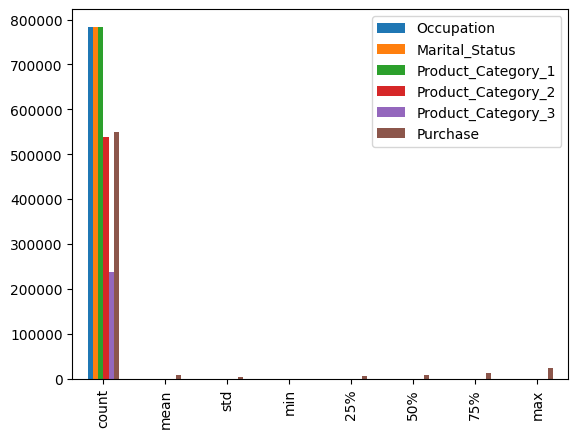

In [ ]:
# the variation in bars of count shows the missing values.
df.describe().plot(kind='bar')

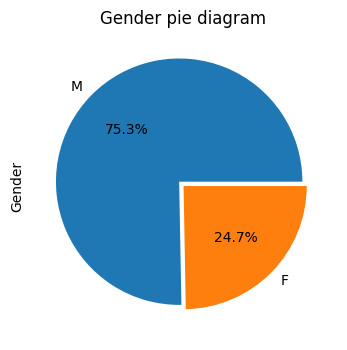

In [ ]:
# it is graphical representation of participation of Male and Female in shopping.
explode = (0.05,0)
df.Gender.value_counts().plot.pie(figsize=(40, 4), autopct='%.1f%%', explode = explode)
plt.title("Gender pie diagram")
plt.show()

## multiple way to encode categorical data and pie chart
- you will see 2 to 4 way to encode the categorical data into numerical which are heplful for Ml and DL process 

In [ ]:
# method 1
# from code the data first convert into numerical numbers then automatically update actual dataset 

In [ ]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True) # M == 0, F == 1
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: uint8

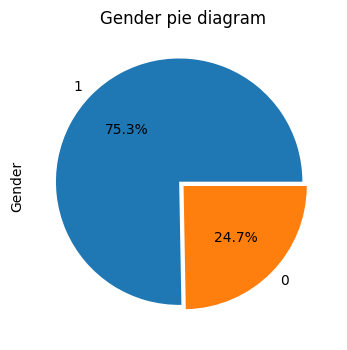

In [ ]:
explode = (0.05,0)
df.Gender.value_counts().plot.pie(figsize=(40, 4), autopct='%.1f%%', explode = explode)
plt.title("Gender pie diagram")
plt.show()

In [ ]:
# it is graphical representation of participation of Male and Female in shopping.
# it shows the data in 1s and 0s not more then these everything is same

In [ ]:
# method 2
# here we are giving the rank to different age groups with help of map()
# it is called target audional encoding

In [ ]:
display(df['Age'].unique())
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
values = df.Age.value_counts() # this will count the frequency of unique value in age column 
labels = df.Age.unique().tolist() # this will convert that list into a list with help of list funaction 
display(labels,values)
display(df['Age'].head())

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

[1, 7, 3, 5, 6, 4, 2]

3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: Age, dtype: int64

0    1
1    1
2    1
3    1
4    7
Name: Age, dtype: int64

In [ ]:
""" 
 Donut Pie Chart
 Exploding Pie Chart
 The radius argument sets the size of the pie chart and autopct='%.1f' formats the percentages in the chart to one decimal
 place.
 autopct If not *None*, is a string or function used to label the wedges with their numeric value.  The label will be 
 placed inside the wedge.
 plt.Circle() creates a circle inside the circle. all parameters inside of it can be modify as par your need
 "gcf" stands for "get current figure
 "gca" stands for "get current axes". add_artist use to add circle inside pie chart"""

' \n Donut Pie Chart\n Exploding Pie Chart\n The radius argument sets the size of the pie chart and autopct=\'%.1f\' formats the percentages in the chart to one decimal\n place.\n autopct If not *None*, is a string or function used to label the wedges with their numeric value.  The label will be \n placed inside the wedge.\n plt.Circle() creates a circle inside the circle. all parameters inside of it can be modify as par your need\n "gcf" stands for "get current figure\n "gca" stands for "get current axes". add_artist use to add circle inside pie chart'

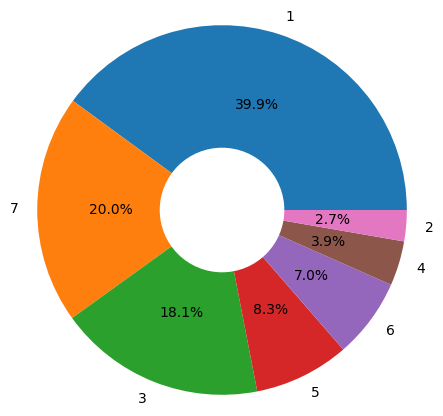

In [ ]:
plt.figure(figsize=(2, 2))  # set the size of the plot
plt.pie(values,labels=labels,radius=3,autopct='%.1f%%') 
my_circle = plt.Circle((0,0),1,color="white") 
p = plt.gcf() 
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
encoded_age = df.Age.unique()
display(encoded_age)
display(sorted(encoded_age))

array([1, 7, 3, 5, 6, 4, 2])

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
# you can Encode col by sk learn library as well as shown below 
"""df['Age']= label_encoder.fit_transform(df['Age']) 
df['Age'].unique()"""

"df['Age']= label_encoder.fit_transform(df['Age']) \ndf['Age'].unique()"

In [ ]:
display(df.City_Category.unique())
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
display(df_city.head())

array(['A', 'C', 'B'], dtype=object)

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
# lets combine the dataframe of df and df_city together into a new DataFrame by concate( method )

In [ ]:
df=pd.concat([df,df_city],axis=1)
df.head() # final df 

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


## dropping unnecessary columns, filling missing values on bases of rules

In [ ]:
# drop City Category Feature b/c we have convert that into numerical columns.
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
# Focus on replacing missing values
col_list=['Product_Category_2','Product_Category_3','Stay_In_Current_City_Years']
dict_unique_val = {} # empty dictionary.
for x in col_list: 
    unique = df[x].unique() # finds the unique value.
    dict_unique_val[x]=unique # put the unique of each column with their name you see them below.
dict_unique_val

{'Product_Category_2': array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
        10., 17., 13.,  7., 18.]),
 'Product_Category_3': array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
        18., 11., 10.]),
 'Stay_In_Current_City_Years': array(['2', '4+', '3', '1', '0'], dtype=object)}

In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','') 
# replace + with '' from Stay_In_Current_City_Years for forever.
display(df.Stay_In_Current_City_Years.unique()) # these are the final unique value 
values = df.Stay_In_Current_City_Years.value_counts() # this will count the frequency of unique value in age column 
ids = df.Stay_In_Current_City_Years.unique().tolist() # this will convert that list into a list with help of list function
display(values, ids)

array(['2', '4', '3', '1', '0'], dtype=object)

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

['2', '4', '3', '1', '0']

In [ ]:
fig = px.pie(df, values = values, names = ids, title = 'Stay_In_Current_City_Years')
fig.update_layout(width=400, height=400)  # set the size of the plot
fig.show()

In [ ]:
# convert object dtype into integers dtpye
col_list = ['Gender','Stay_In_Current_City_Years','B','C']
for x in col_list:
    df[x]=df[x].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [ ]:
## find which column has null Values and how many are they ?
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

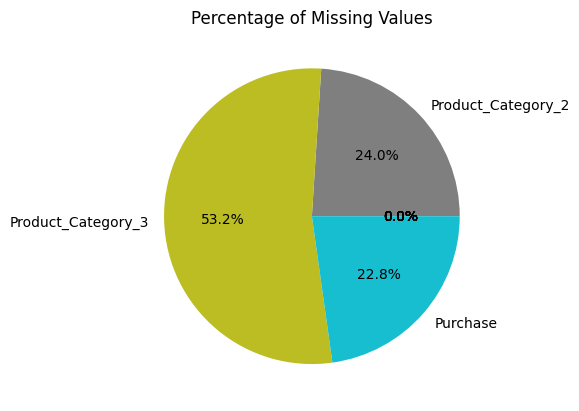

In [ ]:
# Calculate the percentage of missing values in each column
percent_missing = df.isnull().mean() * 100
# Create a pie chart to show the percentage of missing values in each column
percent_missing.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Missing Values')
plt.ylabel('')
plt.show()


In [ ]:
# drop Product_Category_3 Feature b/c the percentage of null value is higher then 30%
df.drop('Product_Category_3',axis=1,inplace=True)

In [ ]:
# it is same we did above to get dictionary with specific column
dic_val_count = {}
col_list=['Product_Category_2','Purchase']
for x in col_list:
    val_count = df[x].value_counts()
    dic_val_count[x]=val_count
dic_val_count

{'Product_Category_2': 8.0     91317
 14.0    78834
 2.0     70498
 16.0    61687
 15.0    54114
 5.0     37165
 4.0     36705
 6.0     23575
 11.0    20230
 17.0    19104
 13.0    15054
 9.0      8177
 12.0     7801
 10.0     4420
 3.0      4123
 18.0     4027
 7.0       854
 Name: Product_Category_2, dtype: int64,
 'Purchase': 7011.0     191
 7193.0     188
 6855.0     187
 6891.0     184
 7012.0     183
           ... 
 23491.0      1
 18345.0      1
 3372.0       1
 855.0        1
 21489.0      1
 Name: Purchase, Length: 18105, dtype: int64}

In [ ]:
# taking the mode value of each column by mode()
dic_mode = {}
col_list=['Product_Category_2','Purchase']
for x in col_list:
    mode = df[x].mode()[0]
    dic_mode[x]=mode
dic_mode

{'Product_Category_2': 8.0, 'Purchase': 7011.0}

In [ ]:
# here we are filling the null value of particular columns with fillna() with mode value
col_list=['Product_Category_2','Purchase']
for x in col_list:
    # Replace the missing values with mode
    df[x]=df[x].fillna(df[x].mode()[0])

In [ ]:
df.reindex() # it reset index if they are disordered after some operations

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,7011.0,1,0
233595,P00254642,0,3,15,4,1,5,8.0,7011.0,1,0
233596,P00031842,0,3,15,4,1,1,5.0,7011.0,1,0
233597,P00124742,0,5,1,4,0,10,16.0,7011.0,0,1


In [ ]:
df.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
count,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000
mean,0.75291,3.496802,8.079300,1.858247,0.409777,5.366196,9.265541,8592.393620,0.420764,0.310954
std,0.43132,1.352736,6.522206,1.288790,0.491793,3.878160,4.301427,4332.686969,0.493682,0.462884
min,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,12.000000,0.000000,0.000000
25%,1.00000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,6996.000000,0.000000,0.000000
50%,1.00000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,7011.000000,0.000000,0.000000
75%,1.00000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,9927.000000,1.000000,1.000000
max,1.00000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,23961.000000,1.000000,1.000000


<Axes: >

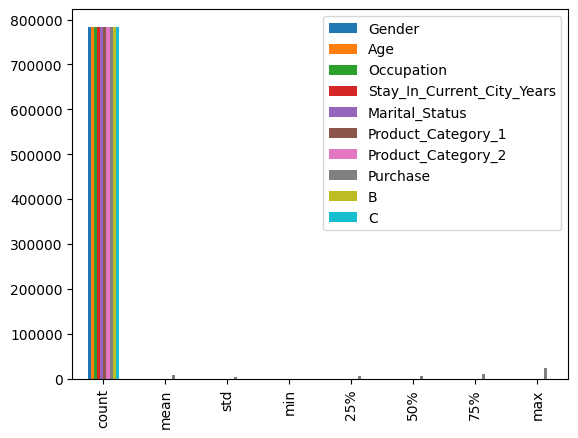

In [ ]:
df.describe().plot(kind='bar') # the plot show that there is no null value b/c null values are removed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Purchase                    783667 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 71.7+ MB


In [ ]:
df.Age.name

'Age'

# viz

## viz on various columns vs target column

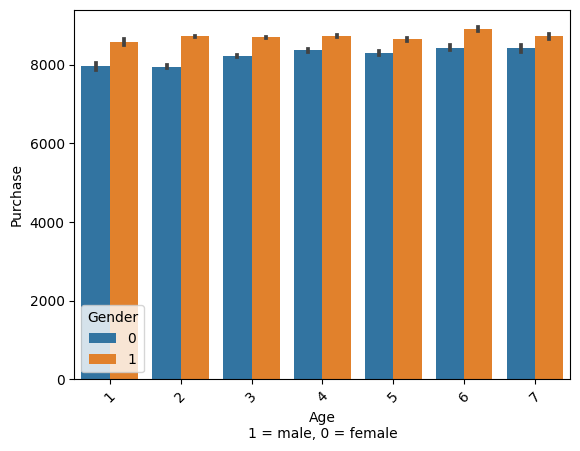

In [ ]:
# Visualisation different col of dataset vs Purchased, b/c Purchase is our target column.
def get_barplot(optional_col, target_col, color_encoder, xlbl="1 = male, 0 = female"):
    sns.barplot(x = optional_col, y = target_col, hue=color_encoder)
    plt.xticks(rotation = 45)
    plt.xlabel(optional_col.name+"\n"+xlbl)
    return plt.show()
get_barplot(df.Age,df.Purchase,df.Gender)
# male are higher then female

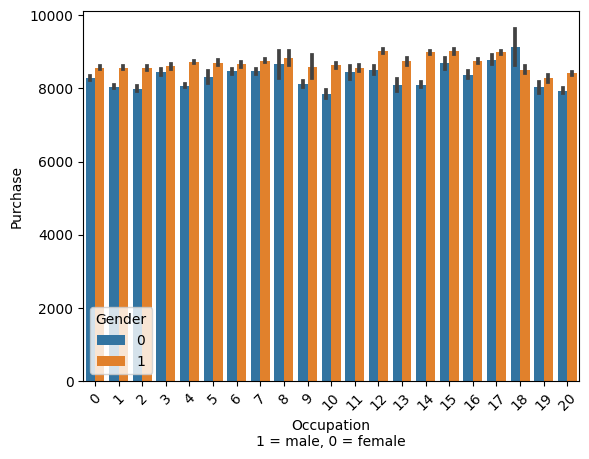

In [ ]:
get_barplot(df.Occupation,df.Purchase,df.Gender)
# overall male are higher except one place.

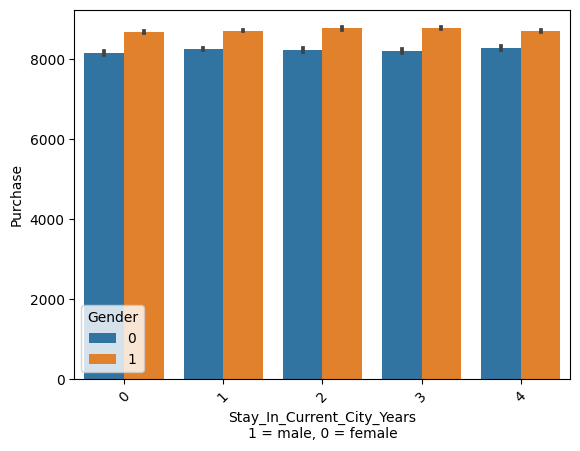

In [ ]:
get_barplot(df.Stay_In_Current_City_Years,df.Purchase,df.Gender)
# male are higher

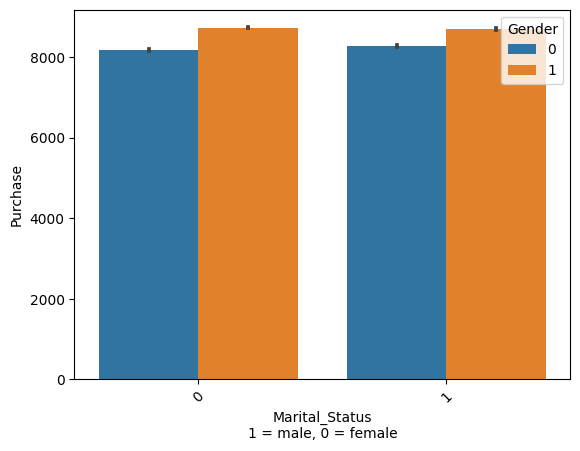

In [ ]:
get_barplot(df.Marital_Status,df.Purchase,df.Gender)
# male are higher 

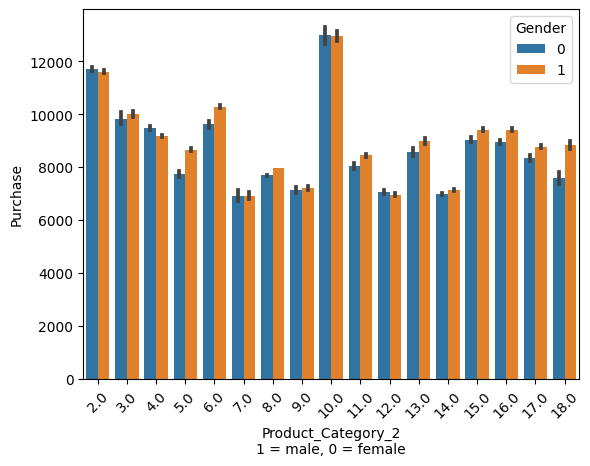

In [ ]:
get_barplot(df.Product_Category_2,df.Purchase,df.Gender)
# variations are recodes but overall male are higher then female however on 3 places female preform bit higher 

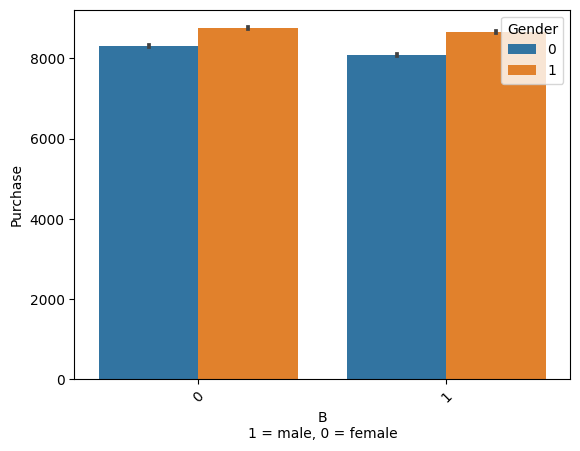

In [ ]:
get_barplot(df.B,df.Purchase,df.Gender)
# male are higher 

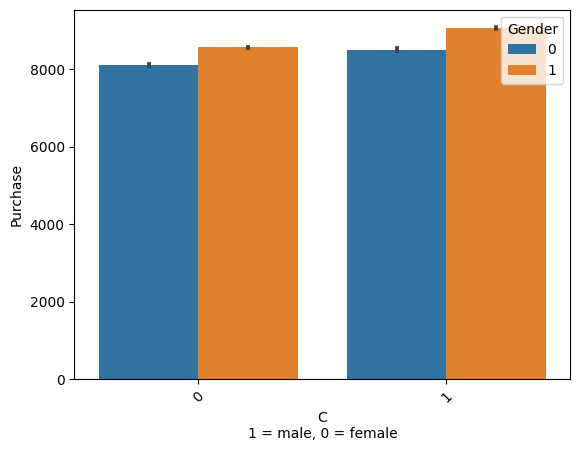

In [ ]:
get_barplot(df.C,df.Purchase,df.Gender)
# male are higher 

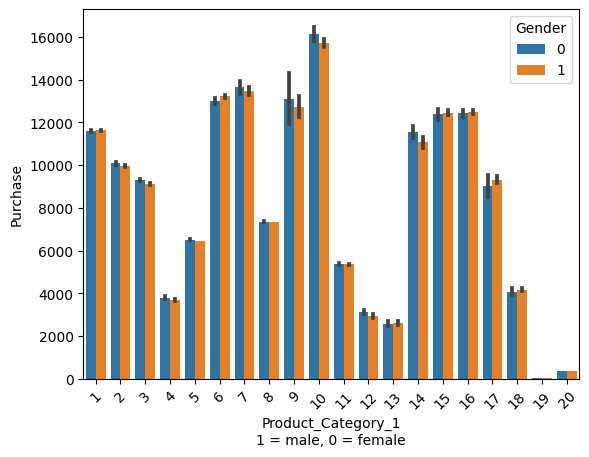

In [ ]:
get_barplot(df.Product_Category_1,df.Purchase,df.Gender)
# overall both have equal ratio although on some category female are higher rate.

In [ ]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,7011.0,1,0
233595,P00254642,0,3,15,4,1,5,8.0,7011.0,1,0
233596,P00031842,0,3,15,4,1,1,5.0,7011.0,1,0
233597,P00124742,0,5,1,4,0,10,16.0,7011.0,0,1


In [ ]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
df.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

In [ ]:
def get_group(*args):
    ratings = df.groupby([*args]).size().reset_index().rename(columns={0: 'rating_Count'})
    return ratings
get_group(df.Marital_Status, df.Stay_In_Current_City_Years)
# 0 ---> married 1---> single
# groupby() tells that the rating_count of Stay_In_Current_City_Years with Marital_Status is higher with married people as compare to single people.

,Marital_Status,Stay_In_Current_City_Years,rating_Count
0,0,0,63842
1,0,1,157873
2,0,2,86730
3,0,3,81802
4,0,4,72291
5,1,0,41874
6,1,1,118552
7,1,2,58697
8,1,3,53626
9,1,4,48380


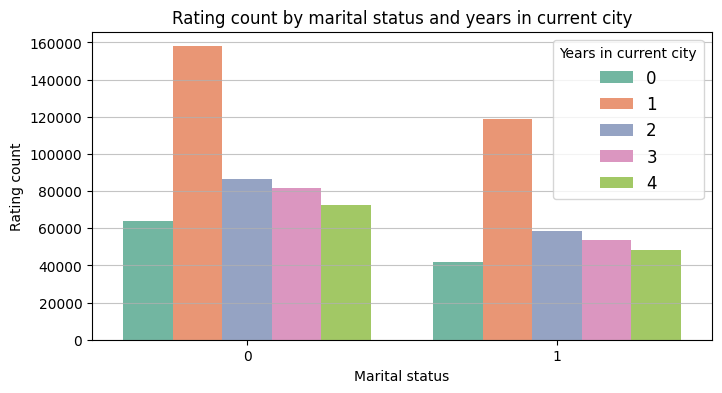

In [ ]:
plt.figure(figsize=(8,4))
# Set color palette
sns.set_palette('Set2')
# Group the data by marital status and years in current city
ratings = df.groupby(['Marital_Status', 'Stay_In_Current_City_Years']).size().reset_index(name='rating_count')
# Create a bar chart
sns.barplot(data=ratings, x='Marital_Status', y='rating_count', hue='Stay_In_Current_City_Years')
plt.legend(title='Years in current city', fontsize=12)
# Add a title and axis labels
plt.title('Rating count by marital status and years in current city')
plt.xlabel('Marital status')
plt.grid(axis='y', alpha=0.75) 
plt.ylabel('Rating count')
# Show the plot
plt.show()

In [ ]:
df['Purchase'].head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

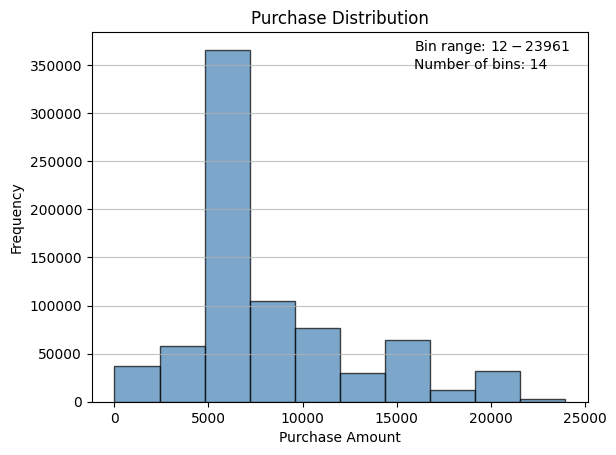

In [ ]:
# Create the histogram
plt.hist(df['Purchase'], bins=10, color='steelblue', edgecolor='black', alpha=0.7)
# Set the title and labels
plt.title('Purchase Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
# Add a grid (line will draw with y-axis )
plt.grid(axis='y', alpha=0.75) 
# Add text to indicate the number of bins and the range of purchase amounts
bin_range = 'Bin range: $' + str(round(df['Purchase'].min())) + ' - $' + str(round(df['Purchase'].max()))
num_bins = 'Number of bins: ' + str(14)
plt.text(0.65, 0.95, bin_range, transform=plt.gca().transAxes)
plt.text(0.65, 0.90, num_bins, transform=plt.gca().transAxes)
# Display the histogram
plt.show()
# history plot shows that the average ammount of purachasing among the customer is 6 to 7 thousand  

In [ ]:
display(df.Purchase.max(), df.Purchase.min())

23961.0

12.0

In [ ]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,7011.0,1,0
233595,P00254642,0,3,15,4,1,5,8.0,7011.0,1,0
233596,P00031842,0,3,15,4,1,1,5.0,7011.0,1,0
233597,P00124742,0,5,1,4,0,10,16.0,7011.0,0,1


# Crosstab()

### simple graph with plt and crosstab

Gender,0,1
Age,,
1,7150,14184
2,35067,106886
3,72430,240585
4,38861,117863
5,18745,46533
6,14142,40642
7,7241,23338


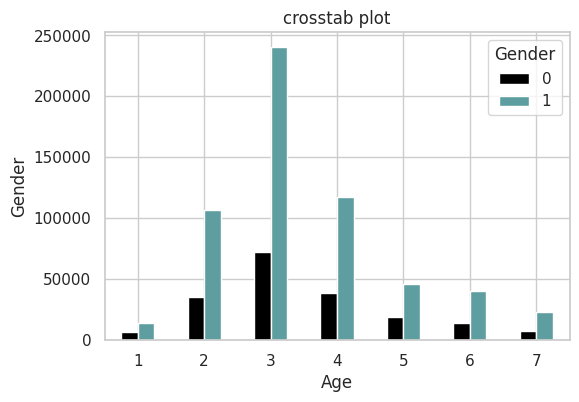

In [ ]:
def get_crosstab_plot(cross_tab_id, title, xlabel, ylabel, figsize=(20,6), angel=0, col1='#000000', col2='#5F9EA0'):
    cross_tab_id.plot(kind="bar", figsize=figsize, color=[col1, col2])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xticks(rotation=angel)
    #plt.savefig('exam.png')
    #plt.legend(["female","male"])
    plt.show()
cross_gen = pd.crosstab(df.Age, df.Gender)
display(cross_gen)
get_crosstab_plot(cross_tab_id=cross_gen, title="crosstab plot", xlabel="Age", ylabel="Gender", figsize=(6,4))

C,0,1
Age,,
1,11253,10081
2,100824,41129
3,235660,77355
4,105792,50932
5,40118,25160
6,33903,20881
7,12433,18146


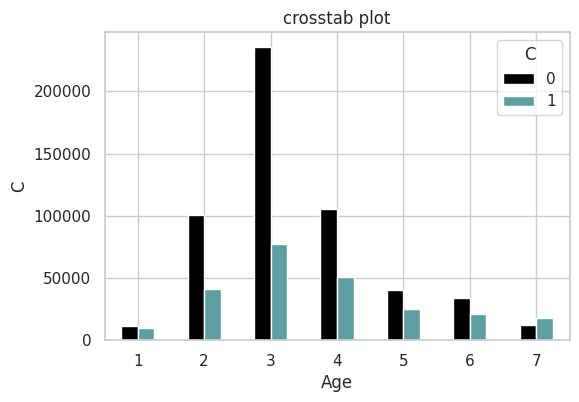

In [ ]:
cross__c = pd.crosstab(df.Age,df.C)
display(cross__c)
get_crosstab_plot(cross__c, "crosstab plot", "Age", "C", figsize=(6,4))
# female are higher.

### filter data representation with seabone graph

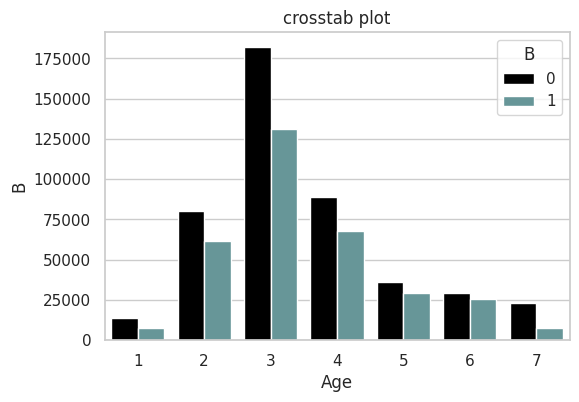

In [ ]:
def get_crosstab_plot(col_id1, col_id2, title, xlabel, ylabel, figsize=(20,6), angel=0, col1='#000000', col2='#5F9EA0'):
    # set the style using Seaborn
    sns.set(style="whitegrid")    
    # create the crosstab and plot the count plot using Seaborn
    ax = sns.countplot(x=col_id1, hue=col_id2, data=df, palette=[col1, col2])
    # set the title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=angel)
    # set the figure size
    ax.figure.set_size_inches(figsize)
    # show the plot
    plt.show()
get_crosstab_plot('Age', 'B', "crosstab plot", "Age", "B", figsize=(6,4))
# female are higher.

In [ ]:
pd.crosstab(df.Age,df.Stay_In_Current_City_Years)

Stay_In_Current_City_Years,0,1,2,3,4
Age,,,,,
1,3094,6939,5072,3924,2305
2,23649,46031,27433,21792,23048
3,39375,110531,56896,56171,50042
4,19746,52954,29989,32684,21351
5,9514,25709,11469,8511,10075
6,6164,24134,8761,7161,8564
7,4174,10127,5807,5185,5286


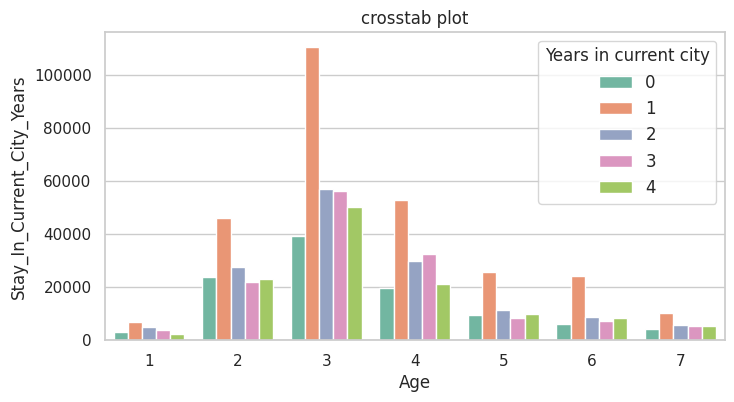

In [ ]:
def get_crosstab_plot(col_id1, col_id2, title, xlabel, ylabel, figsize=(20,6), angel=0):
    # set the style using Seaborn
    #sns.set(style="whitegrid")    
    # create the crosstab and plot the count plot using Seaborn
    ax = sns.countplot(x=col_id1, hue=col_id2, data=df, palette="Set2")    
    # set the title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=angel)    
    # set the figure size
    ax.figure.set_size_inches(figsize)    
    # show the plot
    plt.legend(title='Years in current city', fontsize=12)
    plt.show()
get_crosstab_plot('Age', 'Stay_In_Current_City_Years', "crosstab plot", "Age", "Stay_In_Current_City_Years", figsize=(8,4))

In [ ]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,7011.0,1,0
233595,P00254642,0,3,15,4,1,5,8.0,7011.0,1,0
233596,P00031842,0,3,15,4,1,1,5.0,7011.0,1,0
233597,P00124742,0,5,1,4,0,10,16.0,7011.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Purchase                    783667 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 71.7+ MB


### The viz is done on original data

# outliars

## *outliars delection*

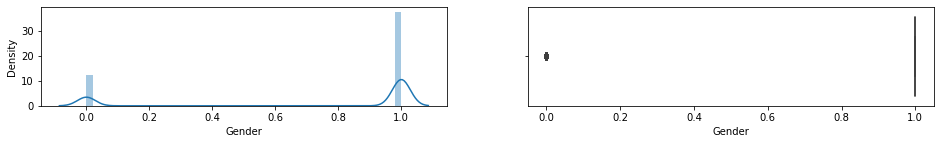

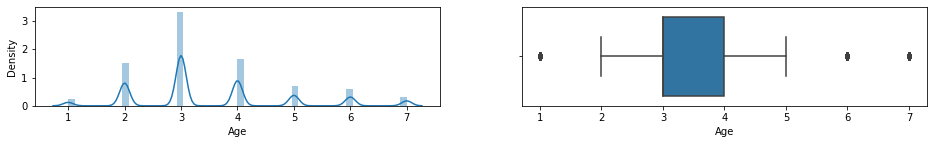

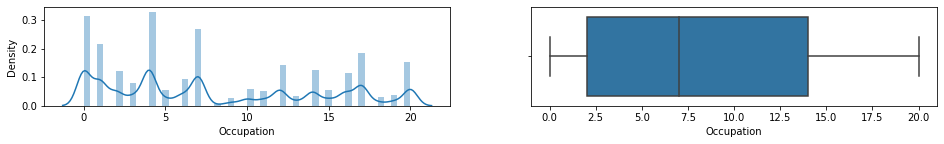

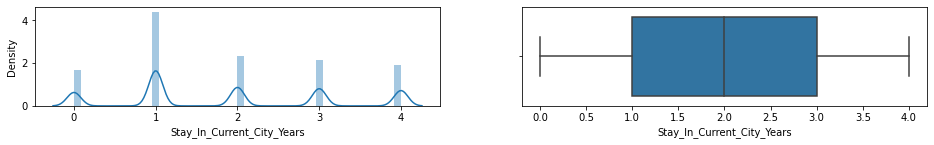

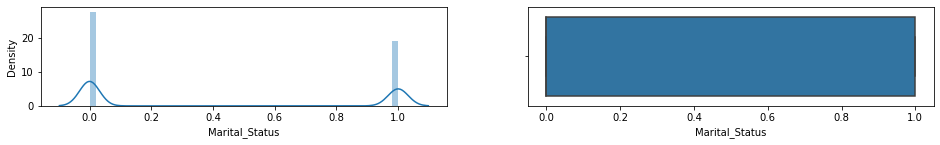

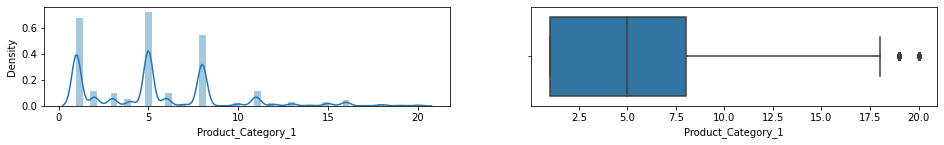

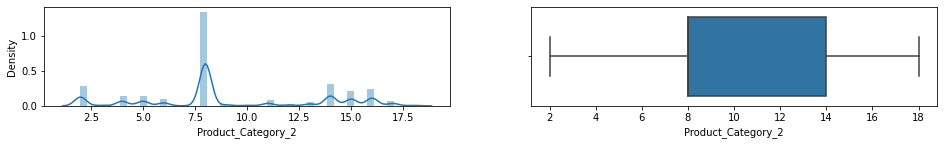

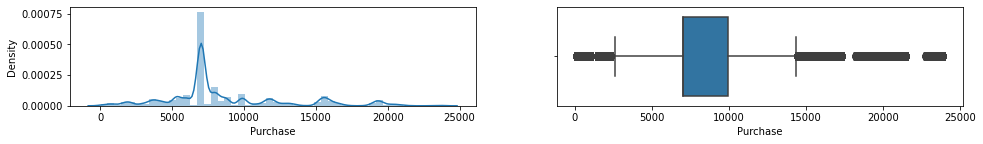

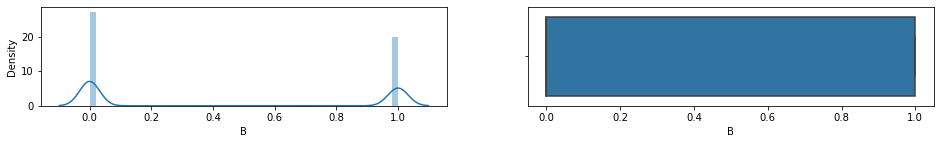

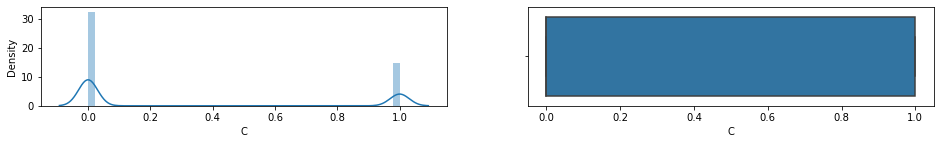

In [ ]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(2,2,1)
        sns.distplot(df[list_var])
        plt.subplot(2,2,2)
        sns.boxplot(df[list_var])
col_names = df.describe().columns
plotvariable(df, col_names)
# some columns have outliars so it better to remove them to get more appropiate results.

In [ ]:
mini = df.Purchase.min()
mini

12.0

In [ ]:
maxi = df.Purchase.max()
maxi

23961.0

In [ ]:
df[df.Purchase==mini]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
545946,P00370293,0,3,2,1,1,19,8.0,12.0,0,0
546016,P00370293,1,4,12,4,1,19,8.0,12.0,0,1
546045,P00370853,0,1,10,3,0,19,8.0,12.0,0,1
546046,P00370293,1,3,12,4,1,19,8.0,12.0,1,0
546173,P00370293,1,3,17,2,0,19,8.0,12.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
549986,P00370853,1,3,12,3,1,19,8.0,12.0,0,0
549989,P00370853,1,7,3,3,0,19,8.0,12.0,0,1
550004,P00370853,1,6,12,1,1,19,8.0,12.0,0,1
550024,P00370293,1,1,10,4,0,19,8.0,12.0,0,1


In [ ]:
df[df.Purchase==maxi]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
87440,P00052842,1,3,4,2,1,10,15.0,23961.0,0,0
93016,P00052842,1,3,0,1,0,10,15.0,23961.0,0,1
370891,P00052842,1,3,17,3,0,10,15.0,23961.0,0,1


In [ ]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'B', 'C'],
      dtype='object')

## IQR Tech:

In [ ]:
#it is gerenally use when data is skewed
def get_outliers(data_f, list_fts):
    for list_ft in list_fts:
        Q1_25per = df[list_ft].quantile(0.25)
        Q3_75per = df[list_ft].quantile(0.75)
        IQR = Q3_75per - Q1_25per
        
        global lowwer_bound, upper_bound
        
        lowwer_bound = Q1_25per - 1.5 * IQR
        upper_bound = Q3_75per + 1.5 * IQR
        
        return Q1_25per, Q3_75per, IQR,lowwer_bound,upper_bound
    
get_outliers(df,['Purchase'])

(6996.0, 9927.0, 2931.0, 2599.5, 14323.5)

## trimming
- trimming is used to remove tye outliars from dataset however by extra ordinary items of particular column of dataset and it very useful in some case so in Purchase and Product_Category_1 have some figure to consider.

In [ ]:
df[(df['Purchase'] > upper_bound) | (df['Purchase'] < lowwer_bound)]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
1,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
5,P00193542,1,3,15,3,0,1,2.0,15227.0,0,0
6,P00184942,1,5,7,2,1,1,8.0,19215.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,365.0,0,1


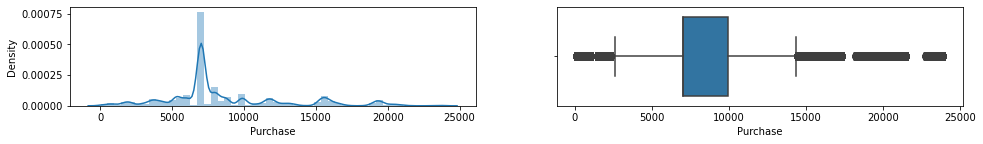

In [ ]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(2,2,1)
        sns.distplot(data_f1[list_var])
        plt.subplot(2,2,2)
        sns.boxplot(data_f1[list_var])
plotvariable(df, ['Purchase'])

## capping 
- capping is used to replace the outliars with lower and upper boundaries without removing them.

In [ ]:
new_df_cap = df.copy()

In [ ]:
new_df_cap['Purchase'] = np.where(new_df_cap['Purchase'] > upper_bound,
                                        upper_bound,np.where(new_df_cap['Purchase'] < lowwer_bound,
                                                            lowwer_bound,
                                                            new_df_cap['Purchase']
                                                            )
                                        )

In [ ]:
# function 
get_outliers(df,['Product_Category_1'])

(1.0, 8.0, 7.0, -9.5, 18.5)

In [ ]:
# trimming
df[(df['Product_Category_1'] > upper_bound) | (df['Product_Category_1'] < lowwer_bound)]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
545915,P00375436,0,1,10,2,0,20,8.0,612.0,0,0
545916,P00372445,1,7,16,4,0,20,8.0,119.0,0,1
545917,P00375436,1,5,7,2,1,20,8.0,481.0,1,0
545918,P00375436,0,6,9,1,0,20,8.0,480.0,0,0
545919,P00372445,1,4,1,1,1,20,8.0,241.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,365.0,0,1


In [ ]:
# capping
new_df_cap['Product_Category_1'] = np.where(new_df_cap['Product_Category_1'] > upper_bound,
                                        upper_bound,np.where(new_df_cap['Product_Category_1'] < lowwer_bound,
                                                            lowwer_bound,
                                                            new_df_cap['Product_Category_1']
                                                            )
                                        )

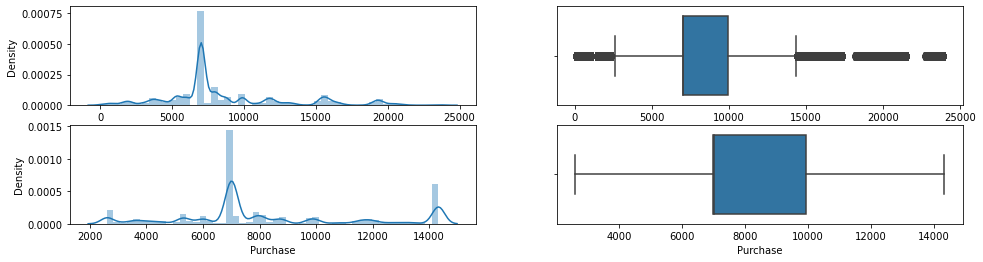

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(2,2,1)
sns.distplot(df['Purchase'])
plt.subplot(2,2,2)
sns.boxplot(df['Purchase'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Purchase'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Purchase'])
plt.show()

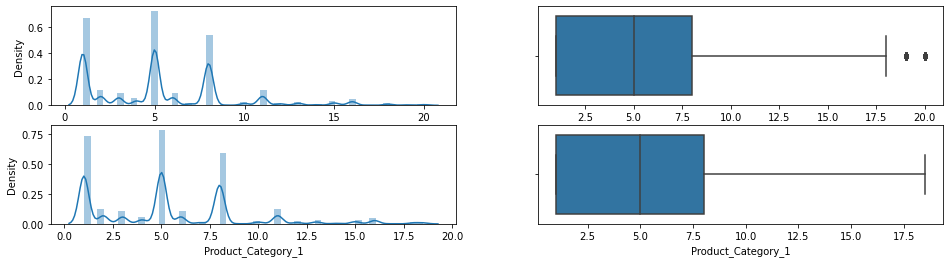

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(2,2,1)
sns.distplot(df['Product_Category_1'])
plt.subplot(2,2,2)
sns.boxplot(df['Product_Category_1'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Product_Category_1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Product_Category_1'])
plt.show()

In [ ]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,7011.0,1,0
233595,P00254642,0,3,15,4,1,5,8.0,7011.0,1,0
233596,P00031842,0,3,15,4,1,1,5.0,7011.0,1,0
233597,P00124742,0,5,1,4,0,10,16.0,7011.0,0,1


In [ ]:
new_df_cap.shape

(783667, 11)

In [ ]:
# the min and max values are changed b/c outliars are remove 
new_df_cap.Purchase.min()

2599.5

In [ ]:
new_df_cap.Purchase.max()

14323.5

# **Note**
- The above viz is done with outliars. Now all outliars are removed from the dataset and ready for viz as done above, to get idea about difference b/w them

#Summary
- male did shopping higher then female
- the age 0-17 group is higher in purchasing items then other groups 
- 2 has highest in Stay_In_Current_City_Years
- the Product_Category_3 Feature has percentage of null value  higher then 30% so it should be remove acc: rule 
- the bar plot shows that mostly male did higher purchasing in all type of columns meanwhile there are some point on which female are bit higher then male and on some place they exhibit same rate.
- groupby() tells that the rating count of Stay_In_Current_City_Years with Marital_Status is higher with married people as compare to single people.
- history plot shows that the average ammount of purachasing among the customer is 6 to 7 thousand  
- by help of crosstab() pandas it can be seen that quantity of male is a bit higher in each age group however the age of 3rd has highest amount of both gender.
- in c and b column female are higher. 
- trimming is used to remove tye outliars from dataset however by extra ordinary items of particular column of dataset and it very useful in some case so in Purchase and Product_Category_1 have some figure to consider.